In [9]:
import pandas as pd
import numpy as np
import joblib
from sklearn.manifold import TSNE



In [10]:
df = pd.read_csv(r'C:/Users/karol/Project-ML/src/data/data_ML/train_data.csv', header=None)

In [11]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Columns: 10000 entries, 0 to 9999
dtypes: float64(10000)
memory usage: 286.1 MB


In [12]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
count,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,...,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000
mean,30.644135,9.080955,169.679419,811.083532,-186.008805,25.717789,24.918118,19.061259,14.826002,14.970447,...,13.997377,21.456582,22.586461,16.736889,13.992185,-1.426345,9.597250,-2.031243,-2.841237,38.071903
std,286.172414,213.166659,43665.003613,57123.457110,21942.466227,711.556331,898.109174,868.676044,532.727247,236.749501,...,269.223339,545.746530,265.221187,503.416444,818.825405,655.666258,204.731554,793.022407,629.128655,768.405732
min,-989.450000,-859.922000,-163336.428000,-243844.632000,-77566.109000,-2414.196000,-3227.681000,-3151.321000,-1792.781000,-794.271000,...,-957.937000,-1983.009000,-937.357000,-1758.858000,-2526.791000,-2165.769000,-739.205000,-2731.037000,-2223.909000,-2565.513000
25%,-163.781750,-135.343500,-29284.119500,-38028.429000,-14426.799500,-448.696750,-590.170250,-562.956500,-349.689750,-144.157750,...,-169.777250,-352.959500,-154.639750,-328.083750,-550.599000,-432.000750,-129.076250,-561.304000,-424.192750,-462.828000
50%,35.478500,2.680500,1181.698500,980.588000,-154.835000,13.931500,13.674000,16.750500,9.731000,11.159500,...,18.700000,38.348500,26.199500,14.575500,1.363500,-3.796500,8.600500,-4.243000,-7.628000,28.107000
75%,215.780500,156.095750,29630.914500,40561.960250,14515.833000,506.893250,630.490750,608.698000,383.110500,179.768250,...,196.049000,396.868500,198.237250,356.185500,574.453250,425.338000,149.855750,539.550000,427.794500,552.173500
max,1224.394000,722.868000,177744.241000,215372.854000,86287.955000,2446.466000,3118.087000,2966.971000,1914.308000,803.200000,...,893.196000,2080.750000,1070.453000,1705.664000,2868.989000,2562.331000,685.176000,3123.617000,2204.527000,2664.074000


In [13]:
df.var()

0       8.189465e+04
1       4.544002e+04
2       1.906633e+09
3       3.263089e+09
4       4.814718e+08
            ...     
9995    4.298982e+05
9996    4.191501e+04
9997    6.288845e+05
9998    3.958029e+05
9999    5.904474e+05
Length: 10000, dtype: float64

In [14]:
for col in df.columns:
    if df[col].dtype == 'float64': df[col] = df[col].astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Columns: 10000 entries, 0 to 9999
dtypes: float32(10000)
memory usage: 143.1 MB


In [15]:
df.isnull().sum().sort_values()

0       0
6663    0
6664    0
6665    0
6666    0
       ..
3334    0
3335    0
3336    0
3329    0
9999    0
Length: 10000, dtype: int64

In [16]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [17]:
df.shape

(3750, 10000)

In [18]:
df.nunique()

0       3742
1       3735
2       3750
3       3750
4       3750
        ... 
9995    3746
9996    3745
9997    3749
9998    3746
9999    3748
Length: 10000, dtype: int64

In [19]:
corr_matrix = df.corr().abs()

In [20]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


<ipython-input-20-7f185152627c>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


In [21]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
df = df.drop(df.columns[to_drop], axis=1)


In [22]:
from scipy.stats import zscore as zscore_outlier
df2 = df.T
def outliers_2(df):
    Q1, Q3 = np.percentile(df, [20, 80])
    IQR = Q3 - Q1
    return (df < (Q1 - 1.5 * IQR))&(df > (Q3 + 1.5 * IQR))

df3 = df2[(np.abs(zscore_outlier(df2)) < 3).all(axis=1)]
df = df3.T
df

,0,1,5,8,9,10,11,13,15,18,...,9986,9988,9989,9990,9991,9992,9993,9995,9996,9998
0,304.360992,-436.589996,-794.408997,-202.410995,-506.851990,-1856.524048,338.402008,-1087.578003,-239.056000,-63.419998,...,347.036011,-134.712997,4.321000,95.293999,-3.936000,-251.811996,256.428986,-1398.604004,42.638000,-191.123001
1,54.047001,90.086998,-589.309021,814.953003,167.272003,82.940002,786.968994,-325.792999,57.437000,370.415985,...,267.289001,-42.546001,38.876999,-176.341003,-426.238007,-542.427979,99.147003,-277.947998,-98.859001,265.230988
2,272.167999,-201.735992,-1029.249023,-570.731018,-161.287994,-1.593000,-808.932983,179.237000,-157.871002,612.111023,...,-246.501007,-185.182999,151.582993,321.425995,-376.032990,142.834000,920.958008,-174.304001,-137.612000,678.322998
3,170.007004,68.736000,895.080994,-691.560974,-31.438999,-614.788025,72.163002,82.144997,50.891998,-35.659000,...,-637.637024,612.218018,-317.117004,-409.919006,400.946014,313.269989,123.171997,147.636993,31.433001,573.432983
4,86.796997,180.052002,-407.453003,-159.507004,-42.291000,735.880981,-370.112000,-602.447998,-156.653000,677.101990,...,1269.718994,-1305.499023,-250.212006,-101.761002,-424.898010,37.254002,-337.431000,14.240000,267.351990,-213.804001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,338.539001,-98.216003,553.155029,1016.729980,49.771999,441.058990,49.013000,685.306030,-0.509000,37.556999,...,1058.442993,-322.299988,-107.473000,350.501007,-607.872986,430.407013,-469.737000,328.635986,105.447998,378.016998
3746,105.511002,-167.468002,711.218018,-171.175003,-325.444000,156.940002,70.671997,599.534973,-321.364990,117.406998,...,292.848999,710.583008,-161.044006,4.759000,-9.079000,104.333000,4.676000,-92.251999,86.110001,433.674011
3747,93.185997,-155.287994,-80.498001,-848.945984,-252.714005,-1122.177002,141.238998,58.970001,-130.815002,-59.051998,...,504.398010,-738.939026,32.973000,-342.855011,-151.955994,7.386000,564.909973,-570.734985,-5.810000,-289.170013
3748,857.065979,98.181999,-340.496002,140.942993,-281.100006,-426.079987,-197.776993,-80.956001,141.923004,14.680000,...,359.941986,-122.820999,137.108994,200.826996,-1445.572021,-39.879002,421.075012,-538.616028,141.365005,310.130005


In [68]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

#PCA + scatterplot

pca = PCA(n_components=2)
# fit on all numerical features and reduce dimensionality to two dimensions
cols = df.columns
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

data_pca = pca.fit_transform(df_std)


# get percentage of retained variance after dimensionality reduction
ex_variance = pca.explained_variance_ratio_.sum()*100
print(f"The reduced 2-dimensional data still contains {ex_variance:.1f}% of the variance of the original data.")

The reduced 2-dimensional data still contains 0.1% of the variance of the original data.


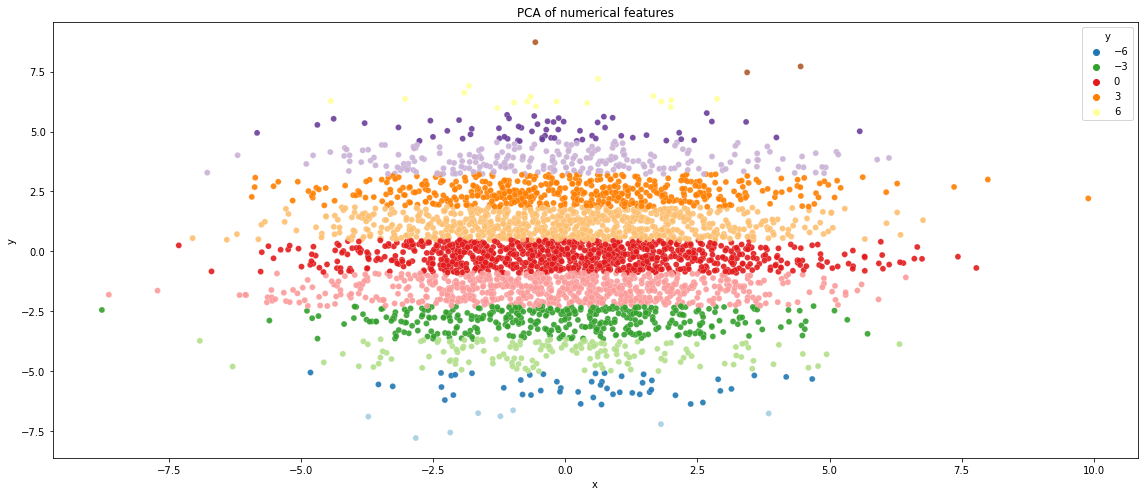

In [69]:
data_pca = pd.DataFrame(data_pca, columns=["x", "y"])
y="y"
data_pca = data_pca.join(df)

plt.figure(figsize=(16,7))
sns.scatterplot(x="x", y="y", data=data_pca, hue=y, palette=sns.color_palette("Paired", as_cmap=True), linewidth=0.2, alpha=0.9)
plt.title(f"PCA of numerical features")
plt.tight_layout()
plt.show()

In [77]:
tsne = TSNE()
pca = PCA(n_components=0.99)
xpca = pca.fit_transform(df_std)
pca_tsne_results = tsne.fit_transform(xpca)

<AxesSubplot:>

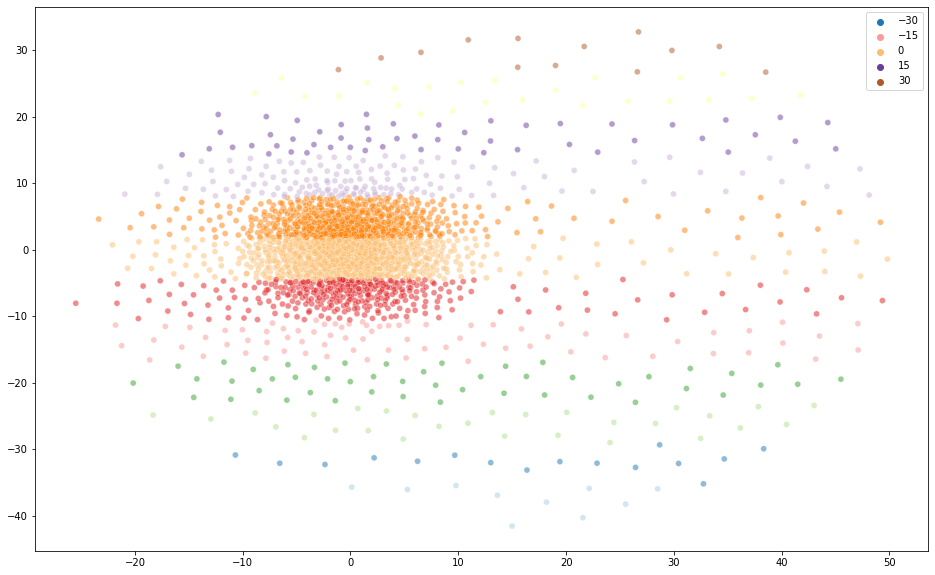

In [127]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    data=pca_tsne_results,
    x=pca_tsne_results[:,0], 
    y=pca_tsne_results[:,1],
    hue=pca_tsne_results[:,1],
    palette=sns.color_palette("Paired", as_cmap=True),
    alpha=0.5
 )

In [128]:
joblib.dump(df, 'train_data_2.pkl')

['train_data_2.pkl']